In [19]:
from acdc_dataset import ACDC_Dataset, One_hot_Transform, load_dataset

import os

from torchvision.transforms import Compose
from torchvision import transforms

from torch.utils.data import DataLoader

from matplotlib import pyplot as plt



In [ ]:

L = 64 # image size L=W
BATCH_SIZE = 128


In [ ]:
dataset_path = "/Users/kajou/OneDrive/Desktop/VQ-VAE/ACDC/database"

train_set_path = os.path.join(dataset_path, "training")
test_set_path  = os.path.join(dataset_path, "testing")


In [21]:
train_dataset = load_dataset(train_set_path)
test_dataset  = load_dataset(test_set_path)


input_transforms = Compose([
    transforms.Resize(size=(L,L), interpolation=transforms.InterpolationMode.NEAREST),
    One_hot_Transform(num_classes=4)
    ])


TrainDataset = ACDC_Dataset(data = train_dataset, transforms= input_transforms) 
TestDataset  = ACDC_Dataset(data = test_dataset, transforms= input_transforms)

TrainLoader  = DataLoader(TrainDataset, batch_size = BATCH_SIZE, shuffle = True)
TestLoader   = DataLoader(TestDataset , batch_size = BATCH_SIZE, shuffle = True)

torch.Size([103, 103])


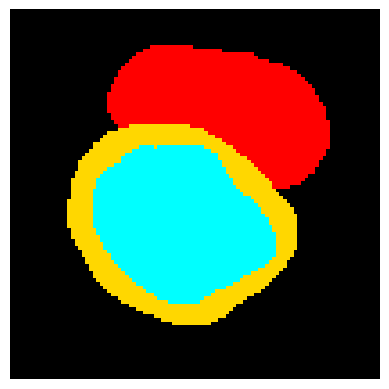

In [22]:
from matplotlib.colors import ListedColormap
custom_colors = [
    '#000000', '#ff0000', '#ffd700', '#00ffff']

cmap = ListedColormap(custom_colors)

slice = train_dataset[20]
plt.imshow(slice , cmap)
plt.axis('off')

print(slice.shape)

Batch of images shape: torch.Size([128, 4, 64, 64])
Batch of segmentations shape: torch.Size([128, 4, 64, 64])


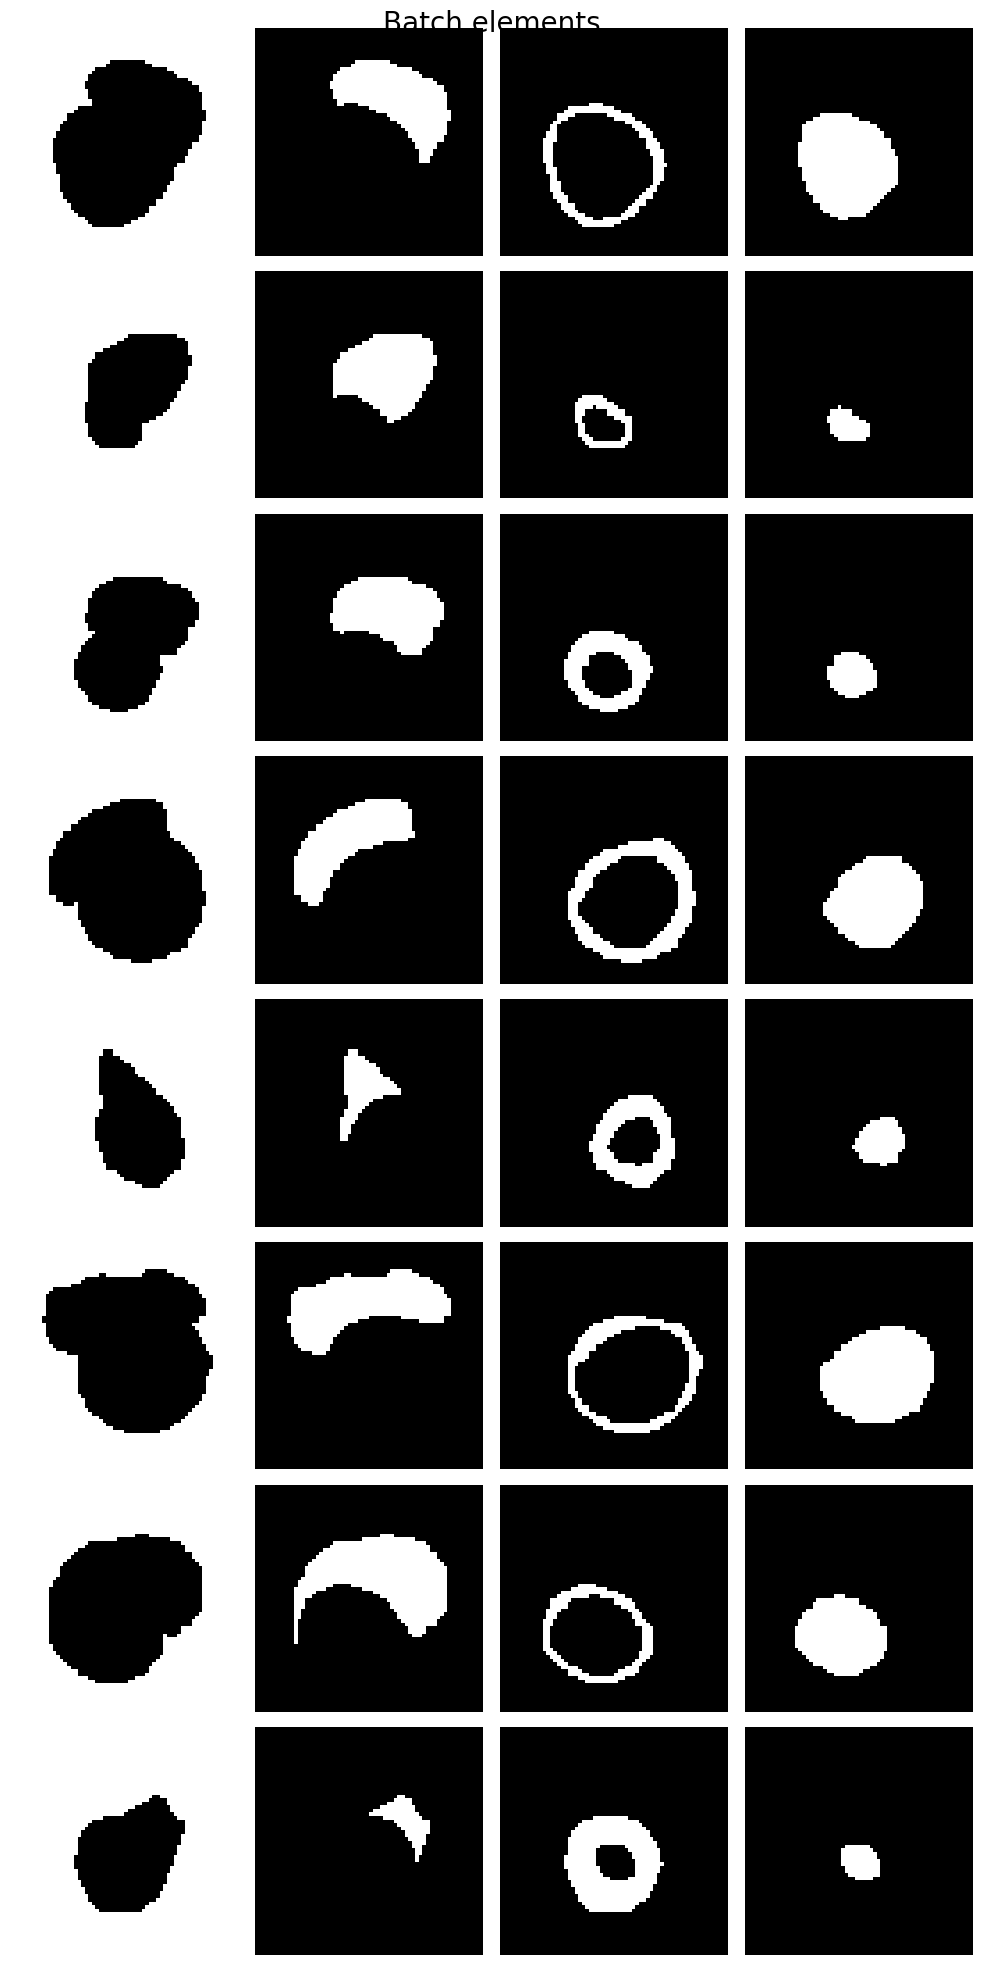

In [23]:
batch = next(iter(TrainLoader))
def visualize_batch(batch):
    batch_size = batch.shape[0]
    samples = 8


    fig, axes = plt.subplots(samples, 4, figsize=(10, 20))  # Adjust figsize to accommodate more rows
    fig.suptitle('Batch elements', fontsize=20)


    for ax in axes.flat:
        ax.set_axis_off()

    for i in range(samples):

        img = batch[i]
        axes[i,0].imshow(img[0,:,:], cmap = 'gray')
        axes[i,1].imshow(img[1,:,:], cmap = 'gray')
        axes[i,2].imshow(img[2,:,:], cmap = 'gray')
        axes[i,3].imshow(img[3,:,:], cmap = 'gray')
        # axes[i].axis('off')

    
    plt.tight_layout()
    plt.show()

# Example usage:
# Visualize the first batch
print(f"Batch of images shape: {batch.shape}")
print(f"Batch of segmentations shape: {batch.shape}")
visualize_batch(batch)